# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load Dataset

In [4]:
# Column names (Sentiment140 dataset format)
columns = ['target','id','date','flag','user','text']

df = pd.read_csv("training.1600000.processed.noemoticon.csv",
                 encoding='latin-1',
                 names=columns)

print(df.head())
print(df.shape)

   target          id                          date      flag  \
0       0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY   
1       0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
2       0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
3       0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4       0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   

              user                                               text  
0  _TheSpecialOne_  @switchfoot http://twitpic.com/2y1zl - Awww, t...  
1    scotthamilton  is upset that he can't update his Facebook by ...  
2         mattycus  @Kenichan I dived many times for the ball. Man...  
3          ElleCTF    my whole body feels itchy and like its on fire   
4           Karoli  @nationwideclass no, it's not behaving at all....  
(1600000, 6)


In [8]:
df.head()

,target,text
0,0,awww thats a bummer you shoulda got david ...
1,0,is upset that he cant update his facebook by t...
2,0,i dived many times for the ball managed to sa...
3,0,my whole body feels itchy and like its on fire
4,0,no its not behaving at all im mad why am i he...


In [6]:
# Required Columns
df = df[['target','text']]
df['target'] = df['target'].replace(4,1)

# Data Cleaning Function

In [7]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\S+', '', text)          
    text = re.sub(r'@\w+', '', text)            
    text = re.sub(r'#', '', text)               
    text = re.sub(r'[^a-zA-Z\s]', '', text)      
    return text

df['text'] = df['text'].apply(clean_text)

# EDA – Sentiment Distribution

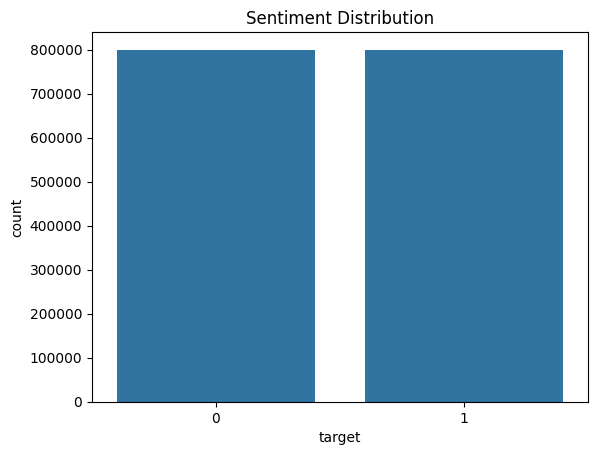

In [9]:
sns.countplot(x='target', data=df)
plt.title("Sentiment Distribution")
plt.show()

# Train Test Split

In [10]:
X = df['text']
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Convert Text to TF-IDF

In [11]:
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train Model (Logistic Regression)

In [12]:
model = LogisticRegression()
model.fit(X_train_vec, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


# Prediction

In [13]:
y_pred = model.predict(X_test_vec)

# Model Evaluation

In [14]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.790290625


In [15]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79    159494
           1       0.78      0.80      0.79    160506

    accuracy                           0.79    320000
   macro avg       0.79      0.79      0.79    320000
weighted avg       0.79      0.79      0.79    320000



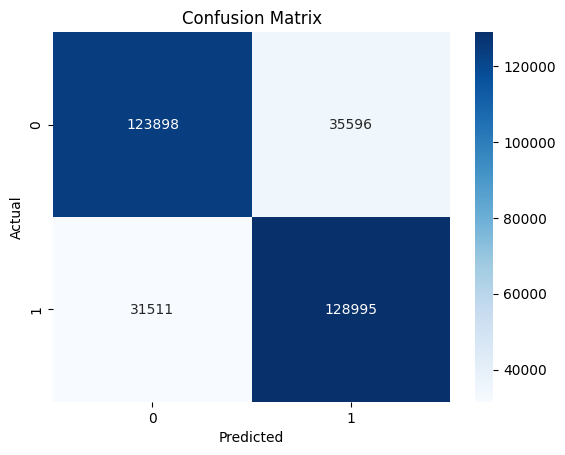

In [16]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [17]:
def predict_sentiment(text):
    text = clean_text(text)
    text_vec = vectorizer.transform([text])
    prediction = model.predict(text_vec)
    
    if prediction[0] == 1:
        return "Positive "
    else:
        return "Negative "

print(predict_sentiment("I love this product"))
print(predict_sentiment("This is very bad service"))


Positive 
Negative 
